In [15]:
import sklearn as sk
import pandas as pd


!pip install kagglehub
import os

print(os.path.expanduser("~/.kaggle/kaggle.json"))


C:\Users\Asus/.kaggle/kaggle.json


In [147]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/online-retail-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Asus\.cache\kagglehub\datasets\lakshmi25npathi\online-retail-dataset\versions\1


In [149]:

files = os.listdir(path)
print("Files in dataset folder:", files)
file_path = os.path.join(path, "online_retail_II.xlsx")
df = pd.read_excel(file_path)
print(df.head(100))


Files in dataset folder: ['online_retail_II.xlsx']
   Invoice StockCode                          Description  Quantity  \
0   489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1   489434    79323P                   PINK CHERRY LIGHTS        12   
2   489434    79323W                  WHITE CHERRY LIGHTS        12   
3   489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4   489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
..     ...       ...                                  ...       ...   
95  489441     22111         SCOTTIE DOG HOT WATER BOTTLE        48   
96  489442     21955     UNION JACK GUNS & ROSES  DOORMAT         2   
97  489442     22111         SCOTTIE DOG HOT WATER BOTTLE         3   
98  489442     22296            HEART IVORY TRELLIS LARGE        12   
99  489442    84899E   YELLOW + BROWN BEAR FELT PURSE KIT        12   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      

In [157]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    525461 non-null  object 
 1   Description  522533 non-null  object 
 2   Price        525461 non-null  float64
dtypes: float64(1), object(2)
memory usage: 12.0+ MB


In [159]:
df = df.drop(["Quantity", "InvoiceDate", "Country", "Invoice", "Customer ID"], axis=1)




KeyError: "['Quantity', 'InvoiceDate', 'Country', 'Invoice', 'Customer ID'] not found in axis"

In [161]:
df.columns


Index(['StockCode', 'Description', 'Price'], dtype='object')

In [197]:

df = df.drop_duplicates()
df.drop_duplicates(subset=["Description"],inplace=True)

Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df["Price"] >= lower_bound) & (df["Price"] <= upper_bound)]

df = df.dropna(subset=['Description'])


In [199]:
df.head(100)

,StockCode,Description,Price,MIX_DES
0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6.95,15cm christmas glass ball 20 lights_6.95
1,79323P,PINK CHERRY LIGHTS,6.75,pink cherry lights_6.75
2,79323W,WHITE CHERRY LIGHTS,6.75,white cherry lights_6.75
3,22041,"RECORD FRAME 7"" SINGLE SIZE",2.10,"record frame 7"" single size _2.1"
4,21232,STRAWBERRY CERAMIC TRINKET BOX,1.25,strawberry ceramic trinket box_1.25
...,...,...,...,...
106,22091,EMPIRE TISSUE BOX,1.25,empire tissue box_1.25
107,84251J,"GREETING CARD, THE BLACK CAT",0.42,"greeting card, the black cat_0.42"
108,22024,RAINY LADIES BIRTHDAY CARD,0.42,rainy ladies birthday card_0.42
109,22026,BANQUET BIRTHDAY CARD,0.42,banquet birthday card _0.42


In [201]:
df['MIX_DES'] = df['Description'].str.lower() +"_"+ df['Price'].astype(str)




In [203]:

df = df.dropna(subset=['MIX_DES'])
df = df.drop_duplicates(subset=['MIX_DES'])
df.drop_duplicates(subset=["Description"])
df['MIX_DES']

0         15cm christmas glass ball 20 lights_6.95
1                          pink cherry lights_6.75
2                         white cherry lights_6.75
3                 record frame 7" single size _2.1
4              strawberry ceramic trinket box_1.25
                            ...                   
520239       baking mould rose milk chocolate_3.25
522692       baking mould chocolate cup cakes_2.55
523069      baking mould easter egg milk choc_2.95
523687                 *boombox ipod classic_16.98
524286                                  faulty_0.0
Name: MIX_DES, Length: 4669, dtype: object

In [205]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
vector= vectorizer.fit_transform(df["MIX_DES"])
print(vector)
vectorizer.vocabulary_

  (0, 33)	0.5277528230420775
  (0, 928)	0.2830865526602471
  (0, 1709)	0.26107299676493
  (0, 337)	0.43039416307201983
  (0, 48)	0.39632869780386615
  (0, 2160)	0.4516597617813563
  (0, 173)	0.16391381611221614
  (1, 2160)	0.6688041185478935
  (1, 2650)	0.3240417553418911
  (1, 882)	0.5758485811534461
  (1, 151)	0.34072922297901614
  (2, 2160)	0.6538549420122036
  (2, 882)	0.5629771560848026
  (2, 151)	0.33311320931534283
  (2, 3729)	0.3802183929171736
  (3, 2852)	0.5035129667941309
  (3, 1603)	0.3970509518817486
  (3, 3161)	0.4528701385869651
  (3, 3164)	0.5468002101171919
  (3, 189)	0.29110719962238557
  (4, 3368)	0.4844809439427022
  (4, 824)	0.4270404140961335
  (4, 3615)	0.5121493066992515
  (4, 570)	0.5121493066992515
  (4, 60)	0.24149715315080392
  :	:
  (4663, 2362)	0.4960124949955034
  (4664, 60)	0.19788058640770986
  (4664, 336)	0.45491198465039545
  (4664, 2948)	0.2867768775832627
  (4664, 2292)	0.426826483028116
  (4664, 918)	0.5201776396321681
  (4664, 2362)	0.467858695377

{'15cm': 33,
 'christmas': 928,
 'glass': 1709,
 'ball': 337,
 '20': 48,
 'lights_6': 2160,
 '95': 173,
 'pink': 2650,
 'cherry': 882,
 '75': 151,
 'white': 3729,
 'record': 2852,
 'frame': 1603,
 'single': 3161,
 'size': 3164,
 '_2': 189,
 'strawberry': 3368,
 'ceramic': 824,
 'trinket': 3615,
 'box_1': 570,
 '25': 60,
 'doughnut': 1342,
 'pot': 2758,
 '_1': 179,
 '65': 139,
 'save': 3027,
 'planet': 2677,
 'mug_1': 2373,
 'fancy': 1475,
 'font': 1584,
 'home': 1887,
 'sweet': 3430,
 'doormat_5': 1319,
 'cat': 814,
 'bowl': 554,
 '55': 119,
 'dog': 1300,
 'chasing': 872,
 'design_3': 1254,
 'heart': 1825,
 'measuring': 2261,
 'spoons': 3256,
 'large_1': 2089,
 'lunchbox': 2210,
 'cutlery': 1185,
 'fairy': 1468,
 'cakes': 700,
 'door': 1316,
 'mat': 2249,
 'black': 478,
 'flock': 1538,
 '_5': 202,
 'love': 2200,
 'building': 637,
 'block': 501,
 'word_5': 3778,
 '45': 98,
 'assorted': 294,
 'colour': 1020,
 'bird': 461,
 'ornament_1': 2503,
 '69': 143,
 'peace': 2587,
 'wooden': 3771,


In [207]:
# 

In [209]:
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(vector)
similarities


array([[1.        , 0.30207191, 0.29531997, ..., 0.02486096, 0.        ,
        0.        ],
       [0.30207191, 1.        , 0.87499188, ..., 0.        , 0.        ,
        0.        ],
       [0.29531997, 0.87499188, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02486096, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [211]:
#retail = input("Enter the product description ^^: ")
retail = "kings choice giant tube matches_2.55"

In [213]:
try:
    product_index = df[df["MIX_DES"].str.lower() == retail].index[0]
except IndexError:
    print("somthing went wronggggg :( Please doublecheck the description.")
else:
    print(product_index)
    

104


In [215]:
similarity_list = list(similarities[product_index])
similarity_list.remove(max(similarity_list))
top_list = sorted(similarity_list, reverse=True)[:3]
top_list

    

[0.8366762084797947, 0.7396404570009207, 0.24466300139084668]

In [217]:
index_list = []
for i in top_list:
    index= list(similarities[product_index]).index(i)
    index_list.append(index)
print(index_list)
for i in index_list:
   description = df.iloc[i]["MIX_DES"]
   print(description)


[868, 513, 1385]
set 12 kids  white chalk sticks_0.42
set 12 kids colour  chalk sticks_0.42
set/4 white retro storage cubes _34.95


In [193]:
#chek if same products have diffrent price : nahhhhhhhhhhhh WERE GOODDDDDDD :)

search_item = "strawberry ceramic trinket box"

# Filter rows where 'Description' matches (case-insensitive)
result = df[df['Description'].str.lower() == search_item.lower()]

if not result.empty:
    # Get all unique prices
    prices = result['Price'].unique()
    print(f"Prices for '{search_item}': {prices}")
else:
    
    print(f"Item '{search_item}' not found.")

Prices for 'strawberry ceramic trinket box': [1.25]


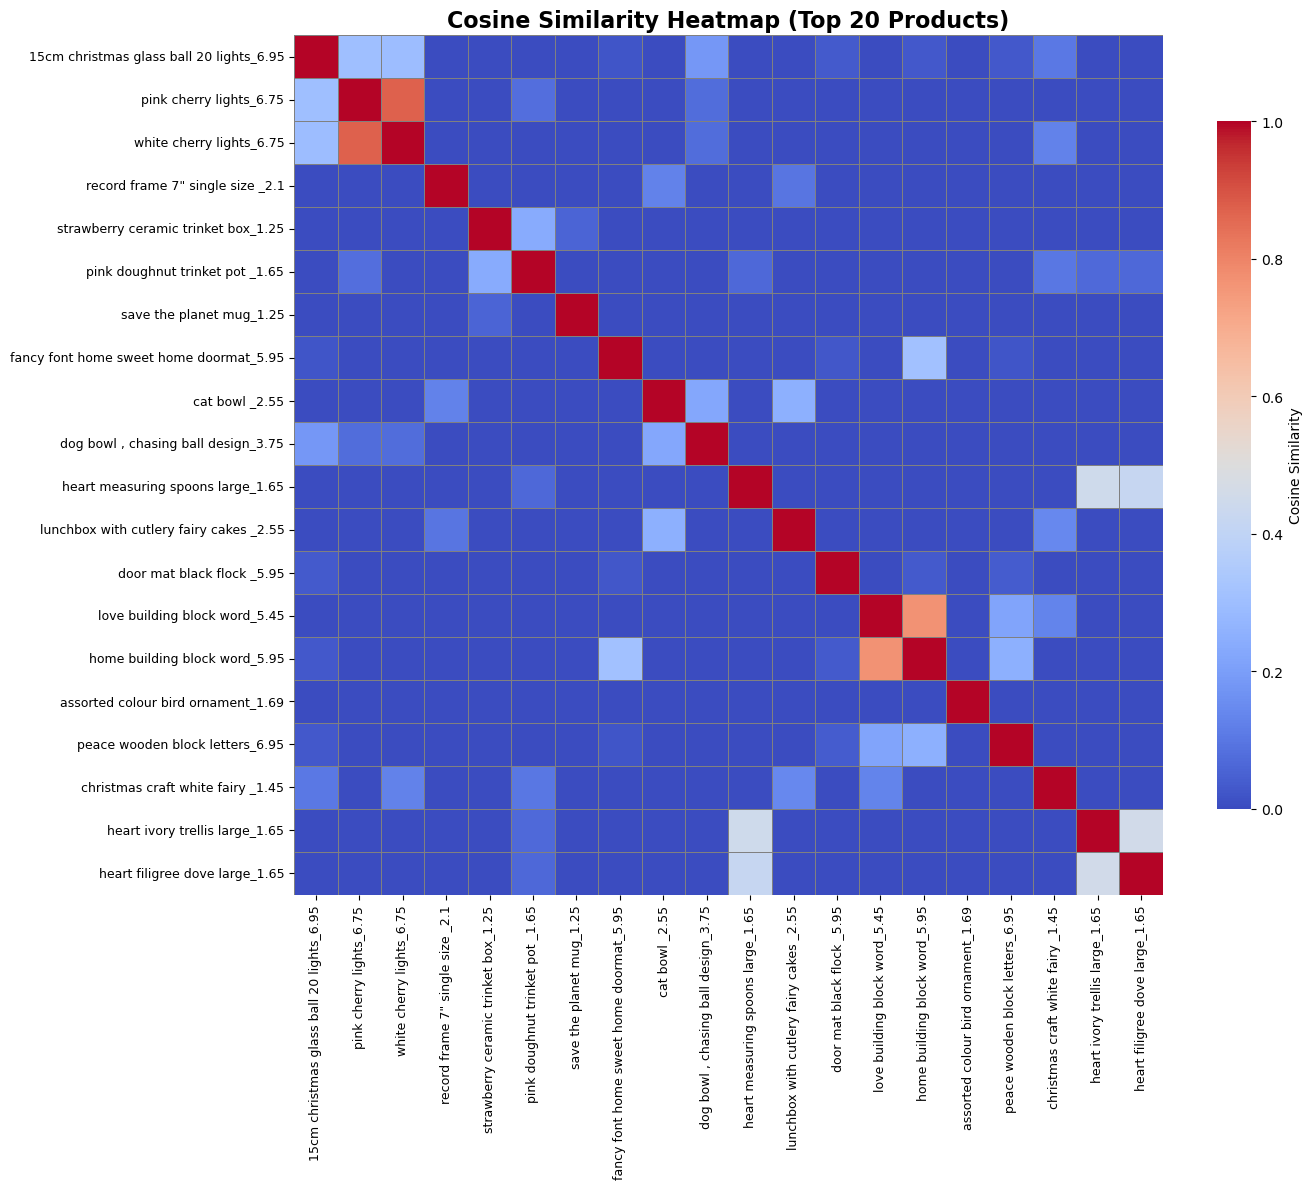

       StockCode                          Description  Price  \
0          85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   6.95   
1         79323P                   PINK CHERRY LIGHTS   6.75   
2         79323W                  WHITE CHERRY LIGHTS   6.75   
3          22041         RECORD FRAME 7" SINGLE SIZE    2.10   
4          21232       STRAWBERRY CERAMIC TRINKET BOX   1.25   
...          ...                                  ...    ...   
520239     22935     BAKING MOULD ROSE MILK CHOCOLATE   3.25   
522692     22937     BAKING MOULD CHOCOLATE CUP CAKES   2.55   
523069     22933    BAKING MOULD EASTER EGG MILK CHOC   2.95   
523687     21120                *Boombox Ipod Classic  16.98   
524286     22423                               faulty   0.00   

                                         MIX_DES  
0       15cm christmas glass ball 20 lights_6.95  
1                        pink cherry lights_6.75  
2                       white cherry lights_6.75  
3               record fram

In [195]:
# chat gbt recommend it as testing method ????

import seaborn as sns
import matplotlib.pyplot as plt

# Select top 20 items (or any number you want)
n = 20
sample_sim = similarities[:n, :n]
sample_labels = df['MIX_DES'].iloc[:n]

plt.figure(figsize=(14, 12))

# Use 'coolwarm' or 'mako' or 'rocket' for better contrast
sns.heatmap(
    sample_sim,
    xticklabels=sample_labels,
    yticklabels=sample_labels,
    cmap='coolwarm',
    annot=False,
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": 0.8, "label": "Cosine Similarity"}
)

plt.title("Cosine Similarity Heatmap (Top 20 Products)", fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

print(df)

In [ ]:
# Q TO ASK 
#1: is spliting data recure ??
#2: is it fine to work on exal data base??
#3 : Does the data need more cleaning or normalization
# 4: Accuracy doesn’t really feel like the right metric here (And what part of the data should I actually test on?)
#5: is data banezarat ?? how can i use y labeling 